In [1]:
%matplotlib inline

import umap
import numpy as np
import pandas as pd
from scipy.stats import norm
from keras.layers import *
from keras.models import Model
import matplotlib.pyplot as plt


C:\Users\ADMIN\AppData\Local\Programs\Python\Python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
data = np.load('data_npy/full%2Fnumpy_bitmap%2Fdog.npy')
data = data.reshape(-1, 28, 28, 1) / 255.0
X = data[:5000]


In [5]:
data.shape

(152159, 28, 28, 1)

In [6]:
data[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [7]:
encoding_size = 32

input_image = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same', data_format='channels_last')(input_image)
x = MaxPooling2D((2, 2), padding='same', data_format='channels_last')(x)
x = Dropout(0.2)(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same', data_format='channels_last')(x)
x = MaxPooling2D((2, 2), padding='same', data_format='channels_last')(x)
x = Dropout(0.2)(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same', data_format='channels_last')(x)
x = MaxPooling2D((2, 2), padding='same', data_format='channels_last')(x)

x = Flatten()(x)                                        # Squashing
x = Dense(256, activation='relu')(x)                    # Squashing
x = Dropout(0.2)(x)                                     # Squashing
encoded = Dense(encoding_size, activation='relu')(x)    # Dense, encoded layer
x = Dense(64*7*7, activation='relu')(encoded)           # Growing
x = Dropout(0.2)(x)                                     # Growing
x = Reshape((-1, 7, 7, 64)[1:])(x)                      # Growing

x = Conv2D(32, (3, 3), activation='relu', padding='same', data_format='channels_last')(x)
x = UpSampling2D((2, 2), data_format='channels_last')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same', data_format='channels_last')(x)
x = UpSampling2D((2, 2), data_format='channels_last')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same', data_format='channels_last')(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same', data_format='channels_last')(x)

autoencoder = Model(input_image, decoded)

In [8]:
autoencoder.compile(optimizer='adam', 
                    loss='binary_crossentropy', 
                    metrics=['mse'])

autoencoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
__________

In [9]:
autoencoder.fit(X, X, 
                batch_size=32,
                validation_split=0.2,
                epochs=10)


Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 61s 15ms/step - loss: 0.4000 - mean_squared_error: 0.0975 - val_loss: 0.3390 - val_mean_squared_error: 0.0797
Epoch 2/10
4000/4000 [==============================] - 46s 11ms/step - loss: 0.3274 - mean_squared_error: 0.0763 - val_loss: 0.3057 - val_mean_squared_error: 0.0699
Epoch 3/10
4000/4000 [==============================] - 45s 11ms/step - loss: 0.3067 - mean_squared_error: 0.0699 - val_loss: 0.2911 - val_mean_squared_error: 0.0651
Epoch 4/10
4000/4000 [==============================] - 46s 12ms/step - loss: 0.2972 - mean_squared_error: 0.0666 - val_loss: 0.2818 - val_mean_squared_error: 0.0618
Epoch 5/10
4000/4000 [==============================] - 44s 11ms/step - loss: 0.2888 - mean_squared_error: 0.0637 - val_loss: 0.2721 - val_mean_squared_error: 0.0584
Epoch 6/10
4000/4000 [==============================] - 44s 11ms/step - loss: 0.2835 - mean_squared_error: 0.0617 - val_lo

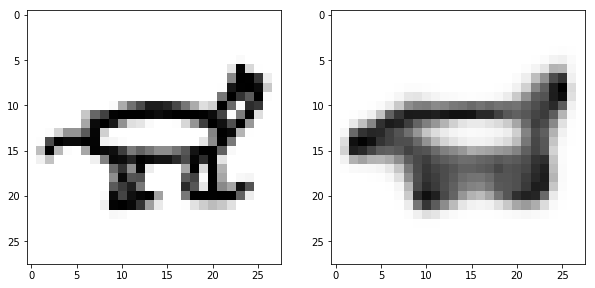

In [14]:
plt.rcParams['figure.figsize'] = (10, 5)

n = np.random.randint(len(data))

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(data[n].reshape(28, 28),
                cmap='Greys');

axarr[1].imshow(autoencoder.predict(data[n].reshape(1, 28, 28, 1)).reshape(28, 28),
                cmap='Greys');


In [15]:

input_image = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same', data_format='channels_last',
           weights=autoencoder.layers[1].get_weights())(input_image)
x = MaxPooling2D((2, 2), padding='same', data_format='channels_last')(x)
x = Dropout(0.2)(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same', data_format='channels_last',
           weights=autoencoder.layers[4].get_weights())(x)
x = MaxPooling2D((2, 2), padding='same', data_format='channels_last')(x)
x = Dropout(0.2)(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same', data_format='channels_last',
           weights=autoencoder.layers[7].get_weights())(x)
x = MaxPooling2D((2, 2), padding='same', data_format='channels_last')(x)
x = Flatten()(x)
x = Dense(256, activation='relu',
          weights=autoencoder.layers[10].get_weights())(x)
x = Dropout(0.2)(x)
encoded = Dense(encoding_size, activation='relu',
          weights=autoencoder.layers[12].get_weights())(x)

encoder = Model(input_image, encoded)


In [12]:
random_image = data.reshape(-1, 28, 28, 1)
Z= encoder.predict(random_image)
print(Z)

[[2.0768154  0.8864758  0.17304693 ... 0.3205185  0.         1.0982106 ]
 [2.3949916  0.         2.7743654  ... 0.9884377  0.         0.78164905]
 [1.470683   1.5109113  4.3539405  ... 1.5364339  0.         0.90104795]
 ...
 [0.27013713 0.19489536 2.3249147  ... 0.7221301  0.         1.2390592 ]
 [1.5641153  0.75487053 0.76585126 ... 1.7887951  0.16642372 1.6330483 ]
 [0.20035315 0.73197645 1.6725672  ... 0.538327   0.         1.3718102 ]]


In [16]:
random_image.shape

(152159, 28, 28, 1)

In [17]:
Z.shape

(152159, 32)

In [27]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=5)
# Fitting the input data
kmeans = kmeans.fit(Z)
# Getting the cluster labels
labels = kmeans.predict(Z)
# Centroid values
centroids = kmeans.cluster_centers_

In [28]:
print(centroids)

[[1.1476912  1.0175738  0.85212195 1.8125103  0.43934637 1.021245
  1.2604774  1.5691376  0.69901156 0.8118404  1.1788929  0.59795856
  0.9456356  0.6070424  2.7004995  1.4293935  2.5045133  1.8053516
  1.8870556  0.8274097  2.0672946  1.7428029  0.45565635 2.708508
  0.8665029  1.697269   1.0770091  1.0172411  2.2375903  0.37975156
  2.3003223  0.66652703]
 [1.2461307  1.0346717  1.2831626  2.349513   1.7939439  2.2558234
  0.47760844 0.96531034 0.49061948 1.272248   0.9520253  1.2803587
  0.59996665 0.8352833  0.7378504  0.86608946 1.2271934  2.2524788
  2.3245547  1.6953273  1.2415224  1.6421219  1.0675478  1.3822627
  1.511496   2.3698595  2.0347044  1.3819065  1.2009909  0.22345373
  1.911305   0.5474344 ]
 [1.3244716  0.66581786 0.99489325 1.7745502  1.1133133  1.0696237
  0.38610873 0.7706599  0.9326079  0.8367427  1.5798242  0.24498385
  0.6939169  0.10356921 0.6143055  0.05165946 2.0314662  0.85700595
  1.2283689  1.214493   0.92312765 1.4241225  1.8175606  1.3568474
  0.37141

In [30]:
centroids.shape

(5, 32)

In [32]:
latent_vector = Input(shape=(32,))
y = Dense(64*7*7, activation='relu', 
          weights=autoencoder.layers[13].get_weights())(latent_vector)
y = Reshape((-1, 7, 7, 64)[1:])(y)
y = Conv2D(32, (3, 3), activation='relu', padding='same', data_format='channels_last', 
           weights=autoencoder.layers[16].get_weights())(y)
y = UpSampling2D((2, 2), data_format='channels_last')(y)
y = Conv2D(32, (3, 3), activation='relu', padding='same', data_format='channels_last', 
          weights=autoencoder.layers[18].get_weights())(y)
y = UpSampling2D((2, 2), data_format='channels_last')(y)
y = Conv2D(32, (3, 3), activation='relu', padding='same', data_format='channels_last', 
           weights=autoencoder.layers[20].get_weights())(y)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same', data_format='channels_last', 
                 weights=autoencoder.layers[21].get_weights())(y)

decoder = Model(latent_vector, decoded)


In [36]:
strokes_decoded=decoder.predict(centroids)

In [42]:
strokes_decoded

array([[[[1.27512822e-05],
         [1.36747431e-07],
         [3.53212304e-09],
         ...,
         [2.19326822e-07],
         [5.96832422e-07],
         [2.18413716e-05]],

        [[8.73329952e-07],
         [9.15960783e-08],
         [5.09423792e-09],
         ...,
         [5.74635851e-06],
         [7.45427087e-06],
         [1.73087337e-05]],

        [[4.40783197e-07],
         [2.13148468e-07],
         [2.33249580e-08],
         ...,
         [5.51661833e-05],
         [3.38187529e-05],
         [1.28308393e-05]],

        ...,

        [[9.41222243e-06],
         [3.02292992e-05],
         [3.84675877e-05],
         ...,
         [3.71956617e-07],
         [1.48882975e-07],
         [5.07077083e-08]],

        [[3.53437713e-06],
         [5.83328892e-06],
         [5.00466831e-06],
         ...,
         [3.22876588e-07],
         [1.04970718e-06],
         [1.98004295e-06]],

        [[2.71006065e-05],
         [5.40226984e-06],
         [2.09472137e-06],
         ...,
 

In [37]:
print(strokes_decoded.shape)

(5, 28, 28, 1)


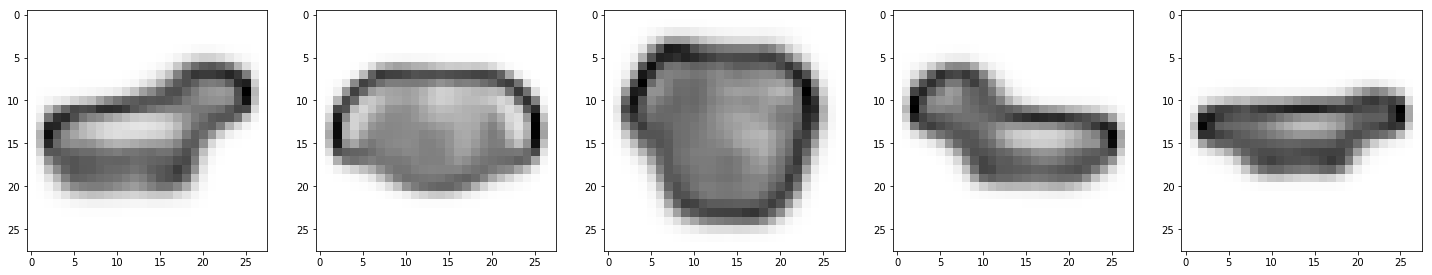

In [41]:
plt.rcParams['figure.figsize'] = (25, 5)
f, axarr = plt.subplots(1, 5)
i=0
for k in centroids:
    random_input = k.reshape(-1, 32)
    axarr[i].imshow(decoder.predict(random_input).reshape(28, 28), cmap='Greys');
    i=i+1


In [18]:
del random_image